<a href="https://www.kaggle.com/code/abbas829/k-means-clustering?scriptVersionId=293951193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎯 *K-Means Clustering Deep Dive: From Intuition to Mastery with Python*  
*The ancient art of grouping — when to wield it, when to avoid it, and how to master it*

> *"In a world of infinite data points, the wise don't see chaos — they see constellations waiting to be named."*  
> — **The Grand Master of ML**

## 📜 Prologue: The Story of Clustering

Imagine you're a **village elder** tasked with organizing 1,000 villagers into **communities**. You don't know their names or histories. All you see are their **attributes**: age, wealth, daily activities.

You could:
- ❌ Randomly assign them (chaos)
- ❌ Force them into pre-defined boxes (bias)
- ✅ **Let the data speak** — group similar souls together naturally

**This is clustering.**  
**K-Means** is the elder's wisdom algorithmized.

## 🎭 Act I: The Philosophy of K-Means

### What is K-Means, Really?

| Analogy | Explanation |
|---------|-------------|
| **The Chef** | K-Means is like organizing ingredients by taste profile — spicy, sweet, savory, bitter |
| **The Stargazer** | Ancient astronomers saw random stars → grouped them into constellations |
| **The Librarian** | Facing 10,000 unlabeled books → sorts them by topic similarity |

> **Core Philosophy**: *"Birds of a feather flock together"* — but mathematically.

### The K-Means Covenant (Algorithm Steps)

```
🔄 THE SACRED RITUAL OF K-MEANS:

Step 1: INITIATION 🎲
    → Choose K random points as "centroids" (tribe leaders)
    
Step 2: ASSIGNMENT 🏠  
    → Each data point joins the nearest centroid's tribe
    
Step 3: UPDATE 👑
    → Centroids move to the center (mean) of their tribe
    
Step 4: REPETITION 🔄
    → Repeat Steps 2-3 until tribes stabilize (convergence)
    
Step 5: ENLIGHTENMENT ✨
    → Clusters emerge organically
```

## 🧮 Act II: The Mathematics Unveiled

### The Objective Function (The Cost of Chaos)

K-Means minimizes **Within-Cluster Sum of Squares (WCSS)**:

$$\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2$$

Where:
- $K$ = number of clusters
- $C_i$ = set of points in cluster $i$
- $\mu_i$ = centroid (mean) of cluster $i$
- $||x - \mu_i||^2$ = squared Euclidean distance

> **Grand Master's Insight**: K-Means is secretly solving an **optimization problem** — finding the arrangement that minimizes "tightness" within groups.

### Why Euclidean Distance?

The Euclidean distance is the **straight-line distance** between two points. It assumes that similarity is based on proximity in the feature space. It's computationally efficient and works well for most applications.

In [1]:
# The Geometry of Similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Beautiful styling
sns.set_theme(style='whitegrid', palette='husl', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

def euclidean_distance(point1, point2):
    """
    The straight-line distance between two souls in n-dimensional space.
    K-Means assumes: "Close in distance = similar in nature"
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Example: Two customers
customer_a = np.array([25, 50, 75])  # Age=25, Income=50k, Spending=75
customer_b = np.array([26, 52, 78])  # Age=26, Income=52k, Spending=78

distance = euclidean_distance(customer_a, customer_b)
print(f"Similarity Score (distance): {distance:.2f}")
print(f"Interpretation: Lower distance = more similar")

Similarity Score (distance): 3.74
Interpretation: Lower distance = more similar


## ⚔️ Act III: When K-Means Reigns Supreme

### 🏆 Perfect Battlegrounds for K-Means

| Scenario | Why K-Means Wins | Example |
|----------|------------------|----------|
| **Customer Segmentation** | Natural groupings by behavior & demographics | E-commerce platforms |
| **Image Compression** | Reduce colors to K dominant palettes | Photo editing software |
| **Document Clustering** | Group articles by topic similarity | News aggregation |
| **Anomaly Detection** | Points far from any centroid = outliers | Fraud detection |
| **Geographic Clustering** | Find optimal store locations | Retail planning |
| **Genomics** | Group genes with similar expression patterns | Biological research |

### The K-Means Advantage Matrix

#### ✅ STRENGTHS:
- **Lightning fast**: O(n×K×I×d) — scales to millions of points
- **Simple to understand** & implement
- **Guaranteed convergence** — always finds a solution
- **Works great** with spherical, well-separated clusters
- **Easily parallelizable** for large datasets

#### ❌ WEAKNESSES:
- **Requires K upfront** — the eternal question: "How many?"
- **Struggles with non-spherical shapes** (moons, spirals)
- **Sensitive to outliers** — they pull centroids like gravity
- **Assumes equal cluster sizes** & densities
- **Random initialization** can trap in local optima

## 🎪 Act IV: The Great K-Means Circus (Interactive Demo)

### Scene 1: The Perfect World

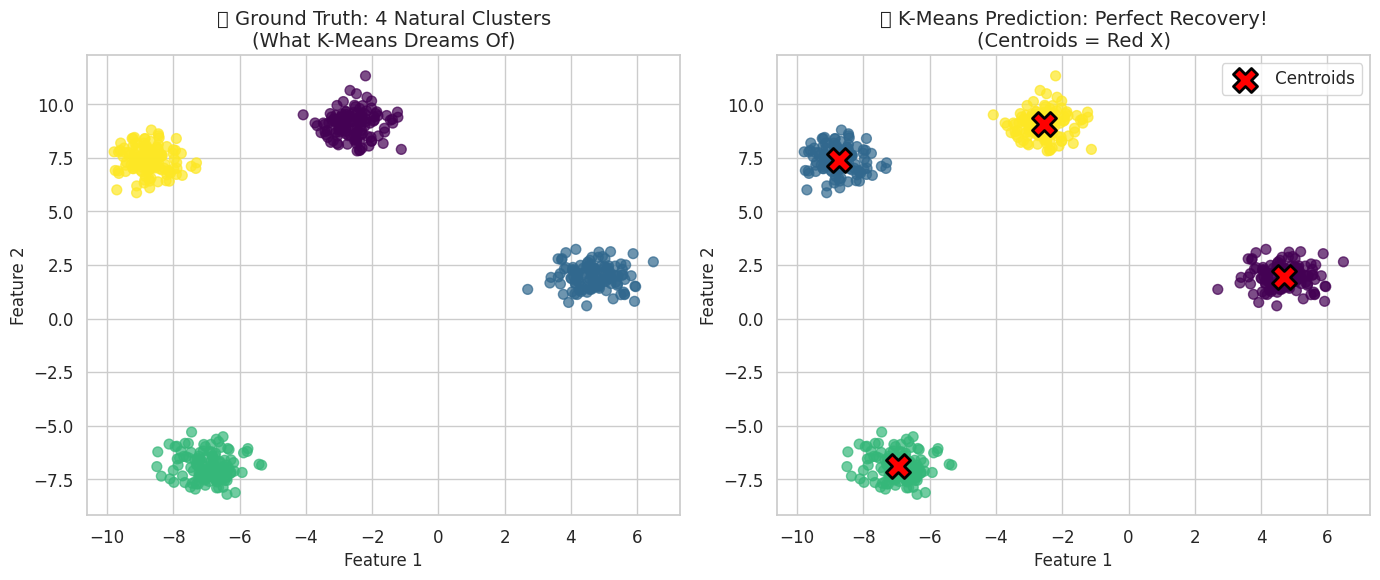

📊 Silhouette Score: 0.876
✨ Interpretation: Score close to 1 indicates well-separated clusters!


In [2]:
# Generate synthetic data where K-Means shines
np.random.seed(42)
X_perfect, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.60,
    random_state=42
)

# Visualize the ground truth
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_perfect[:, 0], X_perfect[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('🎯 Ground Truth: 4 Natural Clusters\n(What K-Means Dreams Of)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# K-Means in action
kmeans_perfect = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred_perfect = kmeans_perfect.fit_predict(X_perfect)

plt.subplot(1, 2, 2)
plt.scatter(X_perfect[:, 0], X_perfect[:, 1], c=y_pred_perfect, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_perfect.cluster_centers_[:, 0], kmeans_perfect.cluster_centers_[:, 1], 
           c='red', s=300, marker='X', edgecolors='black', linewidths=2, label='Centroids')
plt.title('✨ K-Means Prediction: Perfect Recovery!\n(Centroids = Red X)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

print(f"📊 Silhouette Score: {silhouette_score(X_perfect, y_pred_perfect):.3f}")
print(f"✨ Interpretation: Score close to 1 indicates well-separated clusters!")

### 💡 Explanation: Ground Truth vs. K-Means Prediction

*   **Visual 1 (Left - Ground Truth):** Displays the data points colored by their actual generated labels. You can see 4 distinct, well-separated "blobs".
*   **Visual 2 (Right - K-Means Prediction):** Shows the clusters assigned by the K-Means algorithm.
*   **Red 'X' Marks:** These represent the **centroids** (clusters centers) calculated by the algorithm.
*   **Key Insight:** This demonstrates the **ideal scenario** for K-Means. Because the clusters are spherical (round) and well-separated, K-Means recovers the original structure perfectly.

### Scene 2: The Tragedy of Moons

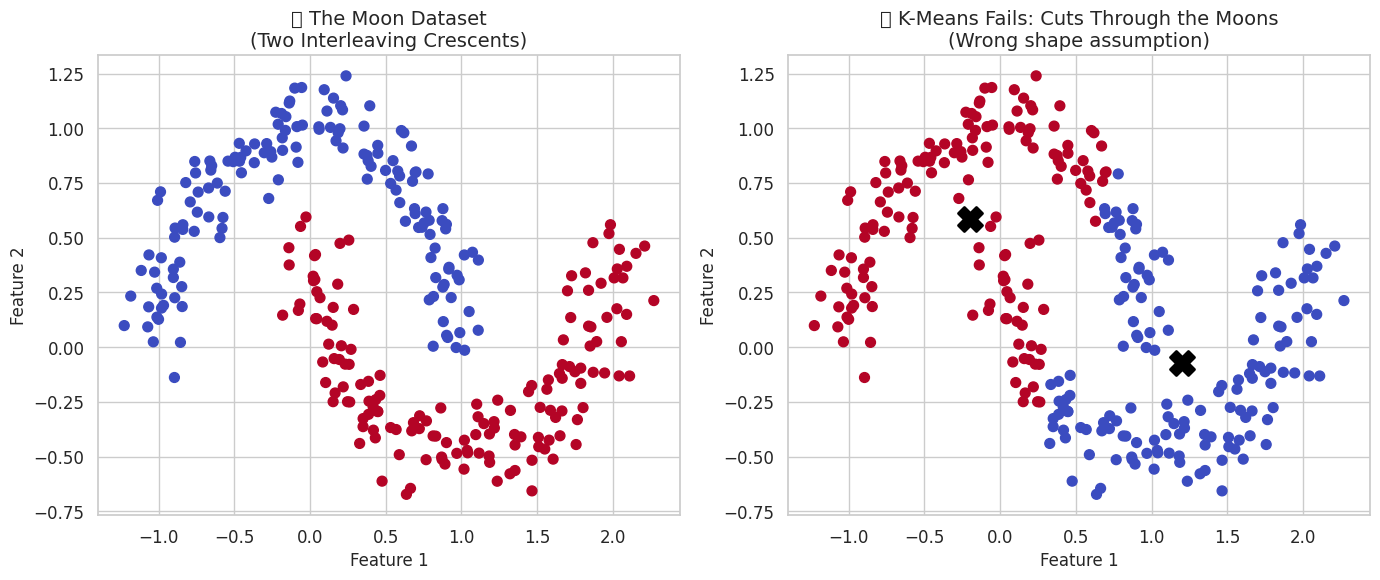

⚠️ Grand Master's Warning:
   K-Means assumes SPHERICAL clusters!
🔄 Alternative Solutions:
   • DBSCAN: Better for non-convex shapes
   • Spectral Clustering: Handles arbitrary shapes
   • Hierarchical Clustering: More flexible


In [3]:
# Where K-Means fails spectacularly
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', s=50)
plt.title('🌙 The Moon Dataset\n(Two Interleaving Crescents)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# K-Means tries its best...
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_moons = kmeans_moons.fit_predict(X_moons)

plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_moons, cmap='coolwarm', s=50)
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], 
           c='black', s=300, marker='X', linewidths=2)
plt.title('💔 K-Means Fails: Cuts Through the Moons\n(Wrong shape assumption)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("⚠️ Grand Master's Warning:")
print("   K-Means assumes SPHERICAL clusters!")
print("🔄 Alternative Solutions:")
print("   • DBSCAN: Better for non-convex shapes")
print("   • Spectral Clustering: Handles arbitrary shapes")
print("   • Hierarchical Clustering: More flexible")

### 💡 Explanation: The Tragedy of Moons (K-Means Failure)

*   **Visual 1 (Left):** The "Moon" dataset, consisting of two interleaving crescent shapes.
*   **Visual 2 (Right):** The result of K-Means clustering on this data.
*   **Key Insight:** This demonstrates a major **limitation** of K-Means. The algorithm assumes clusters are spherical and convex. It fails to detect the crescent shapes and instead essentially draws a straight line through the data, incorrectly grouping points. This highlights why algorithms like DBSCAN are better for irregular shapes.

## 🔮 Act V: The Sacred Quest for K

### The Eternal Question: "How Many Clusters?"

> *"Choosing K is both art and science — let the data whisper, but trust your domain knowledge."*

### Comparison of K-Selection Methods

| Method | How It Works | Advantages | Disadvantages |
|--------|------------|------------|---------------|
| **Elbow Method** | Plot inertia vs K, find the "bend" | Intuitive, visual | Subjective interpretation |
| **Silhouette Score** | Measures how similar a point is to its cluster vs others | Statistical, objective | Computationally expensive |
| **Calinski-Harabasz** | Ratio of between-cluster to within-cluster variance | Fast, no ground truth needed | Less intuitive |
| **Domain Knowledge** | Expert judgment based on business context | Most practical | Requires expertise |

---

### Method 1: The Elbow Method (Visual Intuition)

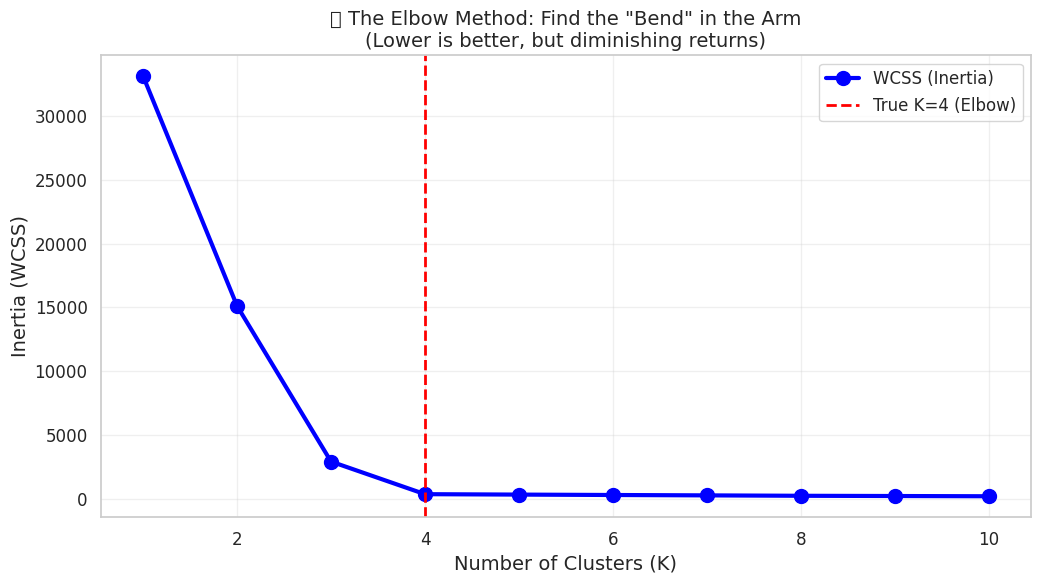

📖 How to read the Elbow Plot:
   1. Inertia decreases as K increases (more clusters = smaller WCSS)
   2. Look for the 'elbow' — where the rate of decrease slows down
   3. Beyond the elbow, additional clusters don't help much

✨ In this case: The elbow is at K=4 (matching our true clusters!)


In [4]:
# THE ELBOW RITUAL
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_perfect)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=3, markersize=10, label='WCSS (Inertia)')
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='True K=4 (Elbow)')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia (WCSS)', fontsize=14)
plt.title('🦴 The Elbow Method: Find the "Bend" in the Arm\n(Lower is better, but diminishing returns)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("📖 How to read the Elbow Plot:")
print("   1. Inertia decreases as K increases (more clusters = smaller WCSS)")
print("   2. Look for the 'elbow' — where the rate of decrease slows down")
print("   3. Beyond the elbow, additional clusters don't help much")
print(f"\n✨ In this case: The elbow is at K=4 (matching our true clusters!)")

### 💡 Explanation: The Elbow Method

*   **X-Axis:** Number of Clusters ($K$).
*   **Y-Axis:** Inertia (Within-Cluster Sum of Squares).
*   **The "Elbow":** As $K$ increases, Inertia always decreases. We look for the point where the rate of decrease dramatically slows down—the "elbow" of the curve.
*   **Key Insight:** In the synthetic example, the elbow is clearly visible at **K=4**, indicating that 4 is the optimal number of clusters, matching the ground truth.

### Method 2: Silhouette Score (Mathematical Validation)

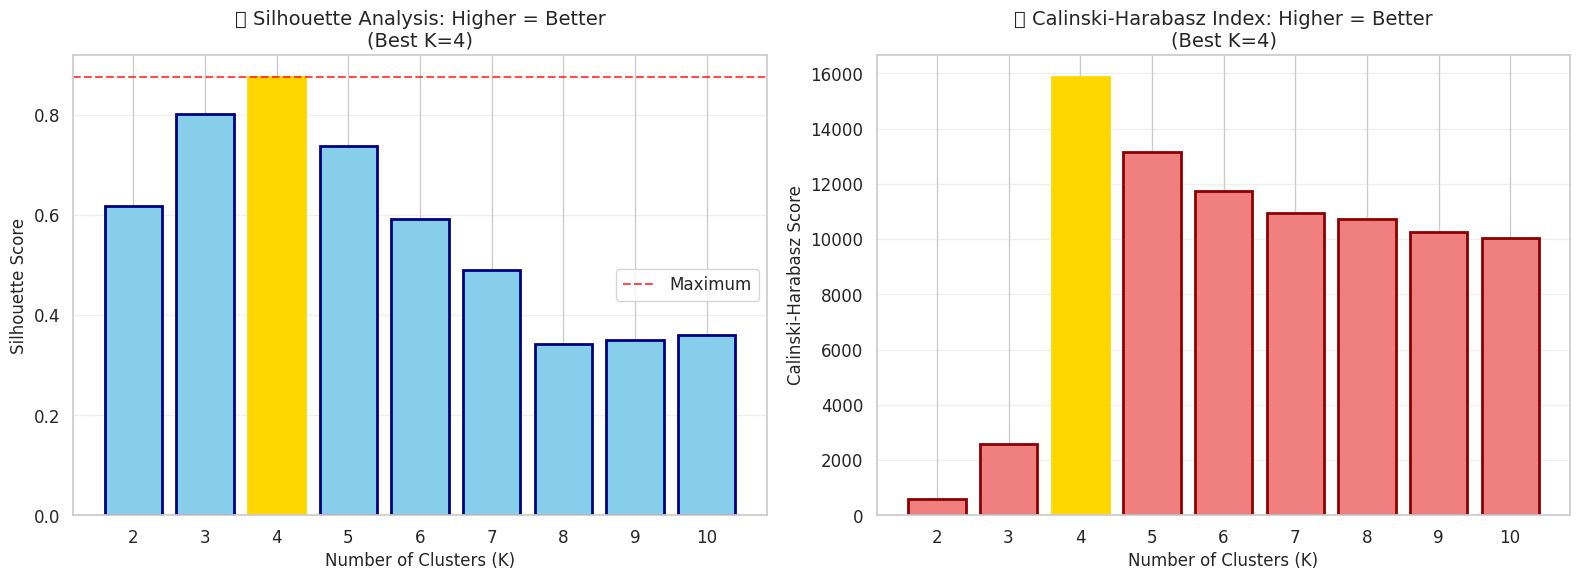

📖 Silhouette Score Interpretation:
   • Score near 1.0 = excellent, well-separated clusters
   • Score near 0.5 = moderate, some overlap
   • Score near 0.0 = clusters are overlapping
   • Negative score = wrong cluster assignment

🏆 Optimal K by Silhouette: 4 (Score: 0.876)
🏆 Optimal K by Calinski-Harabasz: 4 (Score: 15874.7)


In [5]:
# THE SILHOUETTE ORACLE
silhouette_scores = []
calinski_scores = []

for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_perfect)
    sil_score = silhouette_score(X_perfect, labels_temp)
    cal_score = calinski_harabasz_score(X_perfect, labels_temp)
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Silhouette
bars = axes[0].bar(range(2, 11), silhouette_scores, color='skyblue', edgecolor='navy', linewidth=2)
best_k_sil = range(2, 11)[np.argmax(silhouette_scores)]
bars[np.argmax(silhouette_scores)].set_color('gold')

axes[0].axhline(y=max(silhouette_scores), color='red', linestyle='--', alpha=0.7, label='Maximum')
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title(f'📊 Silhouette Analysis: Higher = Better\n(Best K={best_k_sil})', fontsize=14)
axes[0].set_xticks(range(2, 11))
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].legend()

# Calinski-Harabasz
bars2 = axes[1].bar(range(2, 11), calinski_scores, color='lightcoral', edgecolor='darkred', linewidth=2)
best_k_cal = range(2, 11)[np.argmax(calinski_scores)]
bars2[np.argmax(calinski_scores)].set_color('gold')

axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1].set_title(f'📊 Calinski-Harabasz Index: Higher = Better\n(Best K={best_k_cal})', fontsize=14)
axes[1].set_xticks(range(2, 11))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📖 Silhouette Score Interpretation:")
print("   • Score near 1.0 = excellent, well-separated clusters")
print("   • Score near 0.5 = moderate, some overlap")
print("   • Score near 0.0 = clusters are overlapping")
print("   • Negative score = wrong cluster assignment")
print(f"\n🏆 Optimal K by Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.3f})")
print(f"🏆 Optimal K by Calinski-Harabasz: {best_k_cal} (Score: {max(calinski_scores):.1f})")

### 💡 Explanation: Silhouette & Calinski-Harabasz Analysis

*   **Left Chart (Silhouette Score):** Measures how similar a point is to its own cluster compared to other clusters. Values range from -1 to 1. **Higher is better.** A score near 1 indicates dense, well-separated clusters.
*   **Right Chart (Calinski-Harabasz Index):** Ratio of between-cluster dispersion to within-cluster dispersion. **Higher is better.**
*   **Key Insight:** Both metrics peak at **K=4**, mathematically confirming what the Elbow method showed visually.

### Method 3: The Silhouette Plot (Visual Validation)

Creating silhouette plots for K=2,3,4,5...



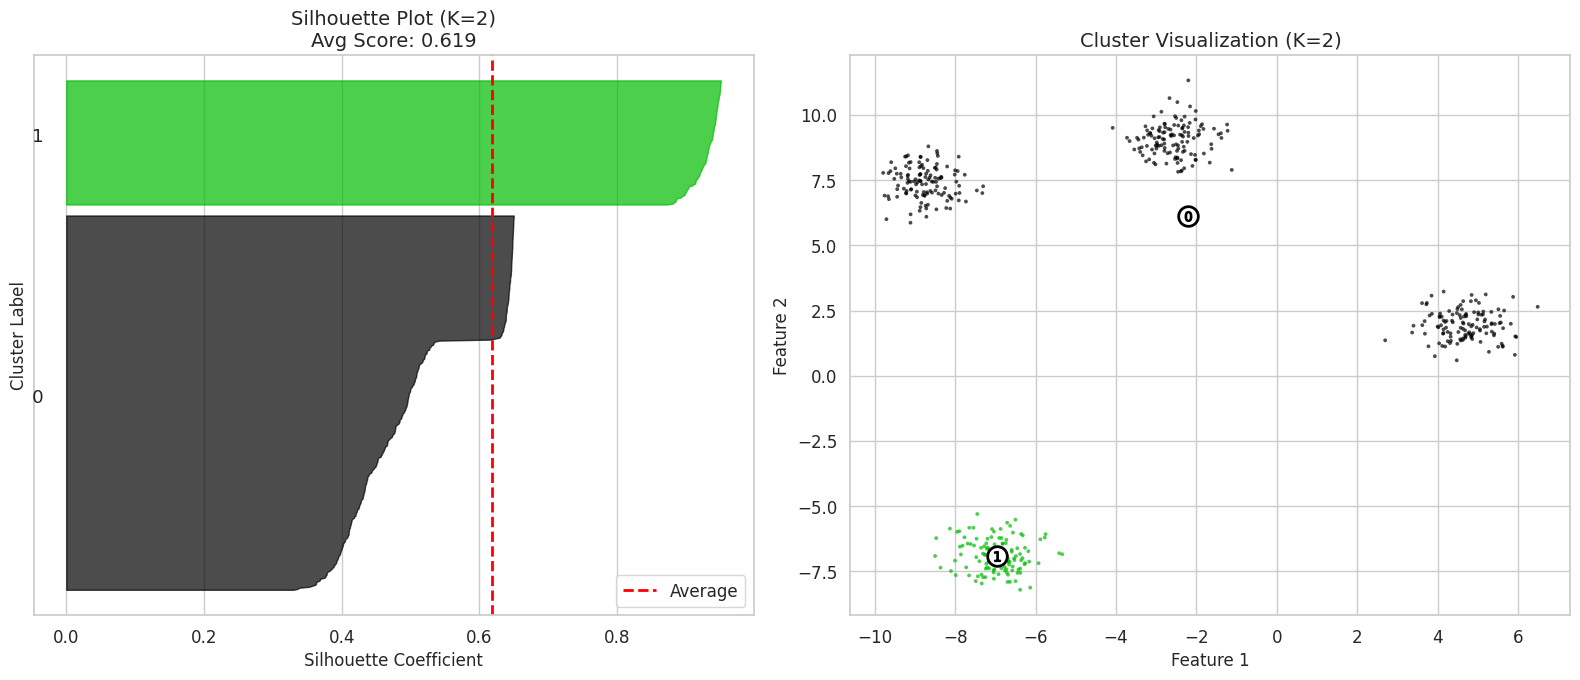

K=2: Silhouette Score = 0.619


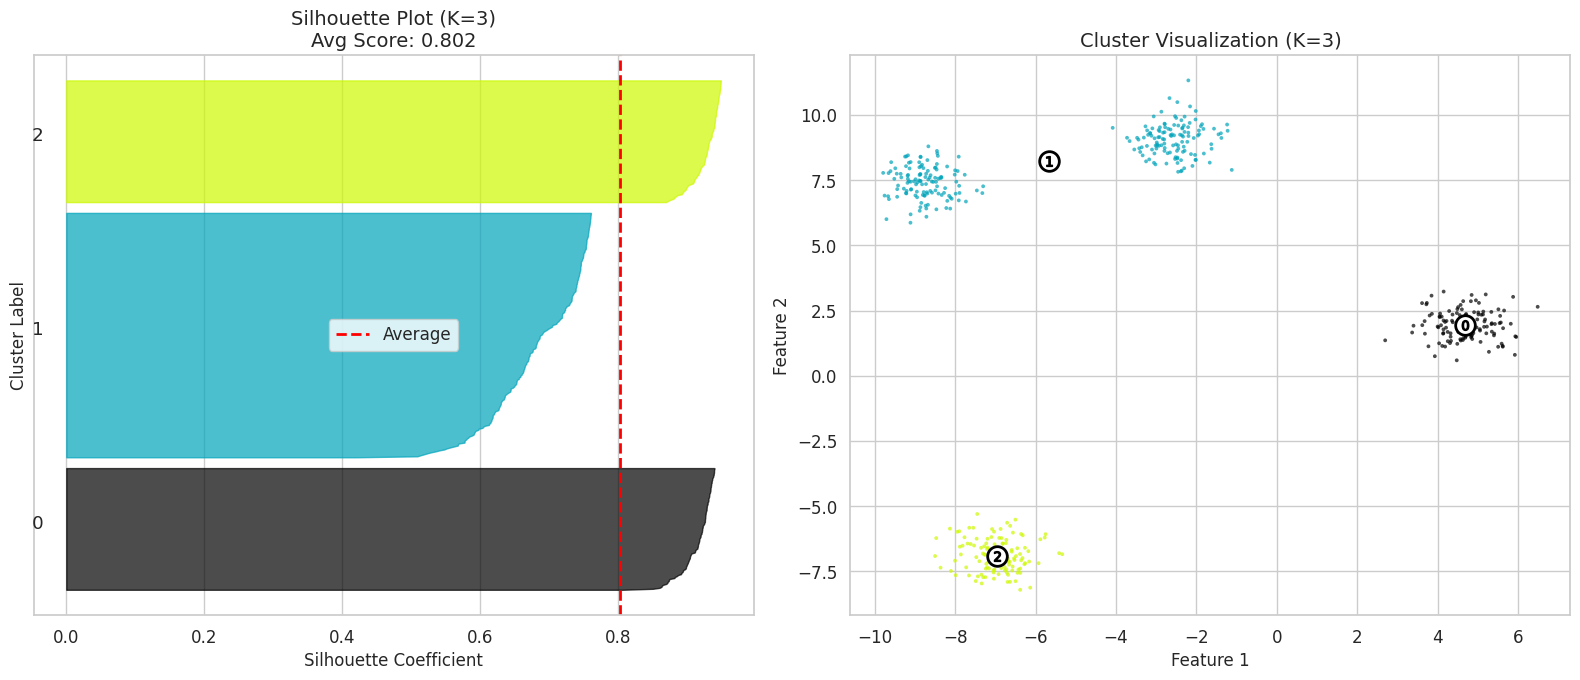

K=3: Silhouette Score = 0.802


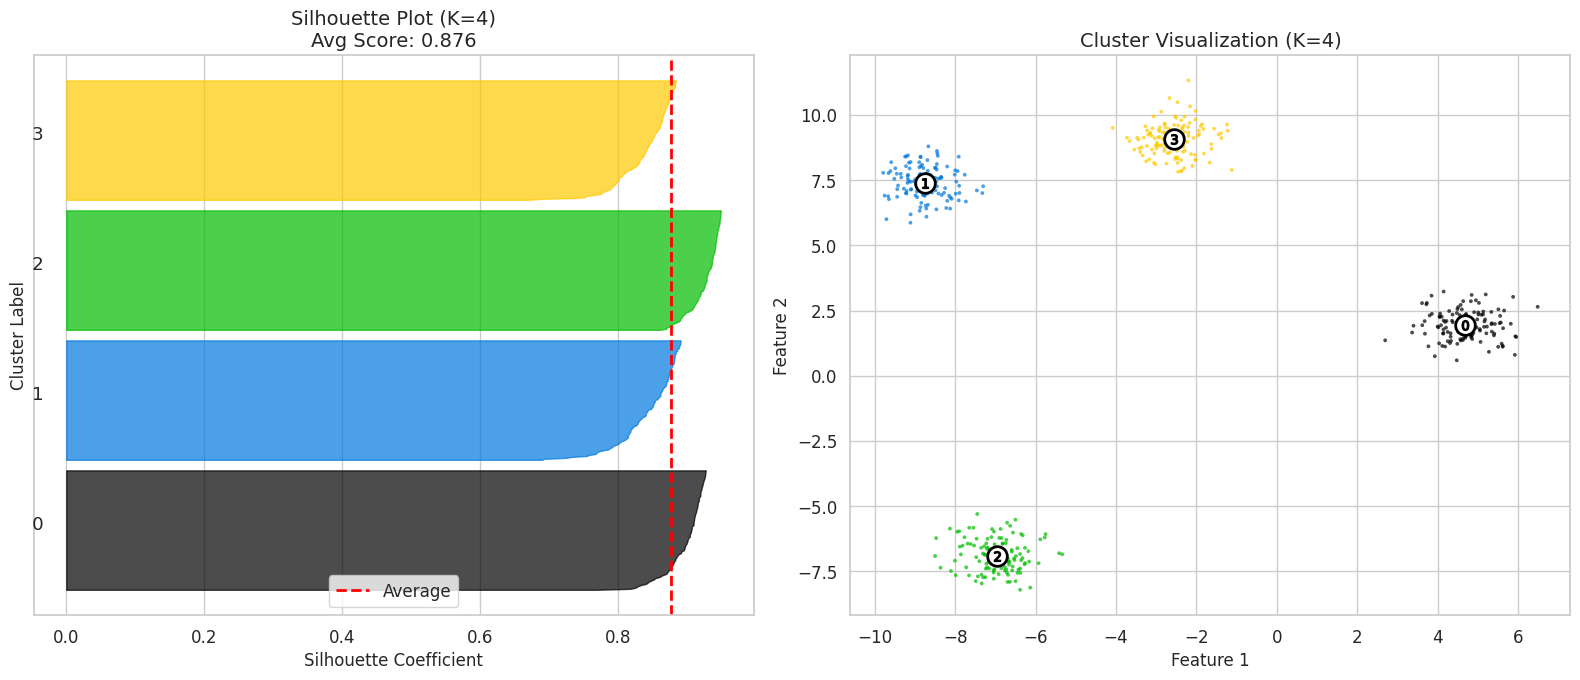

K=4: Silhouette Score = 0.876


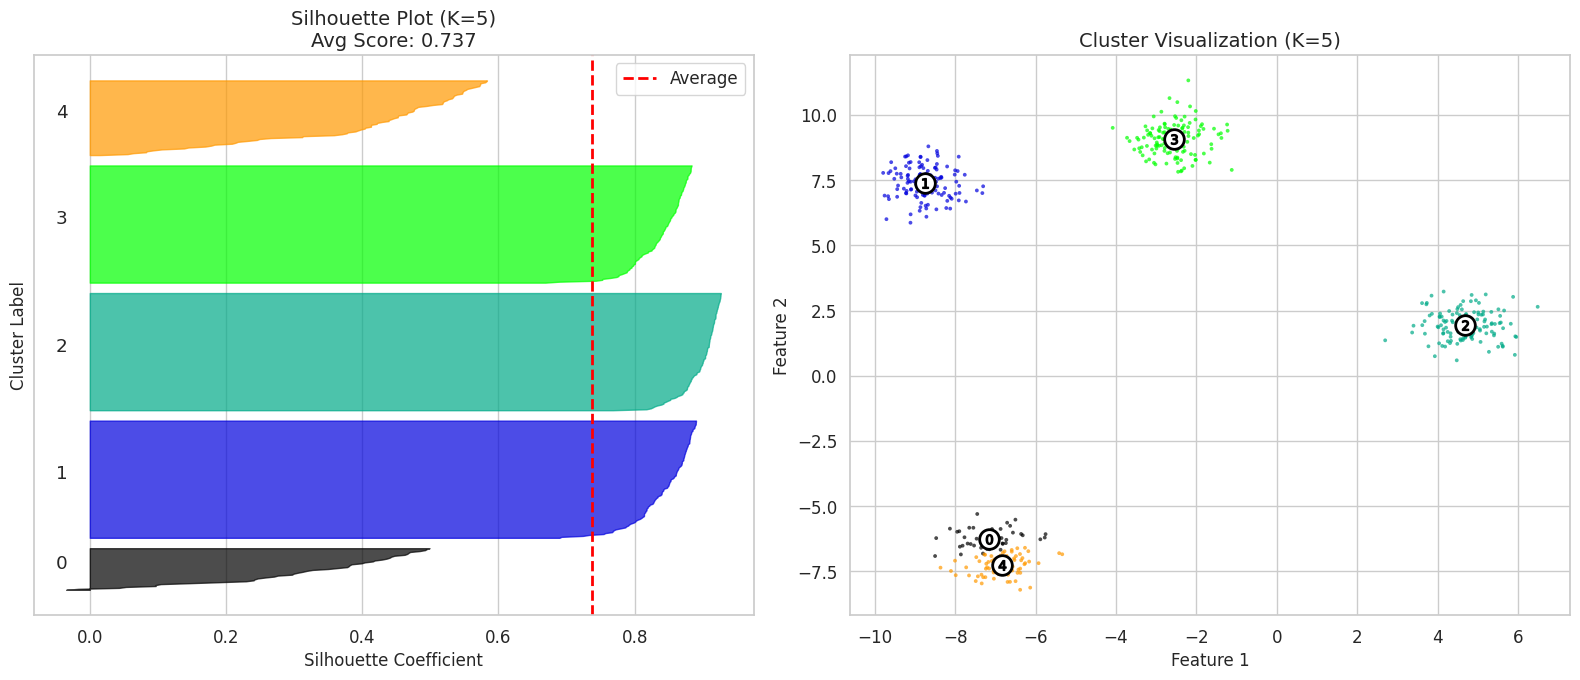

K=5: Silhouette Score = 0.737

📖 How to interpret silhouette plots:
   • Left plot: Shows silhouette width for each cluster
   • Right plot: Shows actual cluster assignments
   • Longer bars = better defined clusters
   • Red line = average silhouette score


In [6]:
# The Grand Master's Signature Move: Visual silhouette analysis
def plot_silhouette_analysis(X, range_n_clusters):
    """
    Creates detailed silhouette plots for each K value.
    Shows both the silhouette values and actual cluster visualization.
    """
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        
        # The silhouette plot
        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        ax1.set_title(f'Silhouette Plot (K={n_clusters})\nAvg Score: {silhouette_avg:.3f}', fontsize=14)
        ax1.set_xlabel('Silhouette Coefficient')
        ax1.set_ylabel('Cluster Label')
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2, label='Average')
        ax1.set_yticks([])
        ax1.legend()
        
        # The actual clusters
        colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k', linewidth=2)
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        ax2.set_title(f'Cluster Visualization (K={n_clusters})', fontsize=14)
        ax2.set_xlabel('Feature 1')
        ax2.set_ylabel('Feature 2')
        
        plt.tight_layout()
        plt.show()
        print(f"K={n_clusters}: Silhouette Score = {silhouette_avg:.3f}")

# Run for K=2,3,4,5
print("Creating silhouette plots for K=2,3,4,5...\n")
plot_silhouette_analysis(X_perfect, [2, 3, 4, 5])

print("\n📖 How to interpret silhouette plots:")
print("   • Left plot: Shows silhouette width for each cluster")
print("   • Right plot: Shows actual cluster assignments")
print("   • Longer bars = better defined clusters")
print("   • Red line = average silhouette score")

### 💡 Explanation: Detailed Silhouette Plots

*   **Left Subplot (Silhouette Peaks):** Each color represents a cluster. The width is the size, length is the score. The **Red Dashed Line** is the average score.
*   **Right Subplot (Cluster Map):** The actual clusters.
*   **Key Insight:** For **K=4**, all clusters have silhouette scores above the average and are of relatively uniform thickness. For other $K$ values, clusters are uneven or below average, indicating suboptimal clustering.

## 🏛️ Act VI: The Real-World Colosseum — Mall Customers

Now let's apply K-Means to a real-world business problem: **Customer Segmentation in a Shopping Mall**

### Step 1: Load and Explore the Data

In [7]:
# LOAD THE ARENA
url = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
df = pd.read_csv(url)
df.drop('CustomerID', axis=1, inplace=True)

print("🏛️ Welcome to the Mall Customer Colosseum!")
print(f"⚔️ Total Warriors (customers): {len(df)}")
print(f"📊 Attributes: {list(df.columns)}")
print(f"\nData Shape: {df.shape}")
print(f"\nFirst few records:")
print(df.head(10))
print(f"\nData Info:")
print(df.info())
print(f"\nDescriptive Statistics:")
print(df.describe())

🏛️ Welcome to the Mall Customer Colosseum!
⚔️ Total Warriors (customers): 200
📊 Attributes: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data Shape: (200, 4)

First few records:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
5  Female   22                  17                      76
6  Female   35                  18                       6
7  Female   23                  18                      94
8    Male   64                  19                       3
9  Female   30                  19                      72

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Nu

### Step 2: Data Preprocessing

In [8]:
# PREPROCESSING RITUAL
df_processed = df.copy()

# Encode gender
le = LabelEncoder()
df_processed['Gender'] = le.fit_transform(df_processed['Gender'])  # Female=0, Male=1

print("Gender Encoding:")
print(f"  Female -> 0")
print(f"  Male -> 1")

# Scale features (CRITICAL for K-Means!)
scaler = StandardScaler()
X_mall = scaler.fit_transform(df_processed)

print(f"\n✨ Data purified and scaled for the clustering ceremony")
print(f"Feature ranges before scaling:")
print(df_processed.describe().loc[['min', 'max']].T)
print(f"\nFeature ranges after scaling (mean=0, std=1):")
scaled_df = pd.DataFrame(X_mall, columns=df_processed.columns)
print(scaled_df.describe().loc[['mean', '50%']].T)

Gender Encoding:
  Female -> 0
  Male -> 1

✨ Data purified and scaled for the clustering ceremony
Feature ranges before scaling:
                         min    max
Gender                   0.0    1.0
Age                     18.0   70.0
Annual Income (k$)      15.0  137.0
Spending Score (1-100)   1.0   99.0

Feature ranges after scaling (mean=0, std=1):
                                mean       50%
Gender                  3.108624e-17 -0.886405
Age                    -1.021405e-16 -0.204535
Annual Income (k$)     -2.131628e-16  0.035879
Spending Score (1-100) -1.465494e-16 -0.007764


### Step 3: Finding the Optimal K

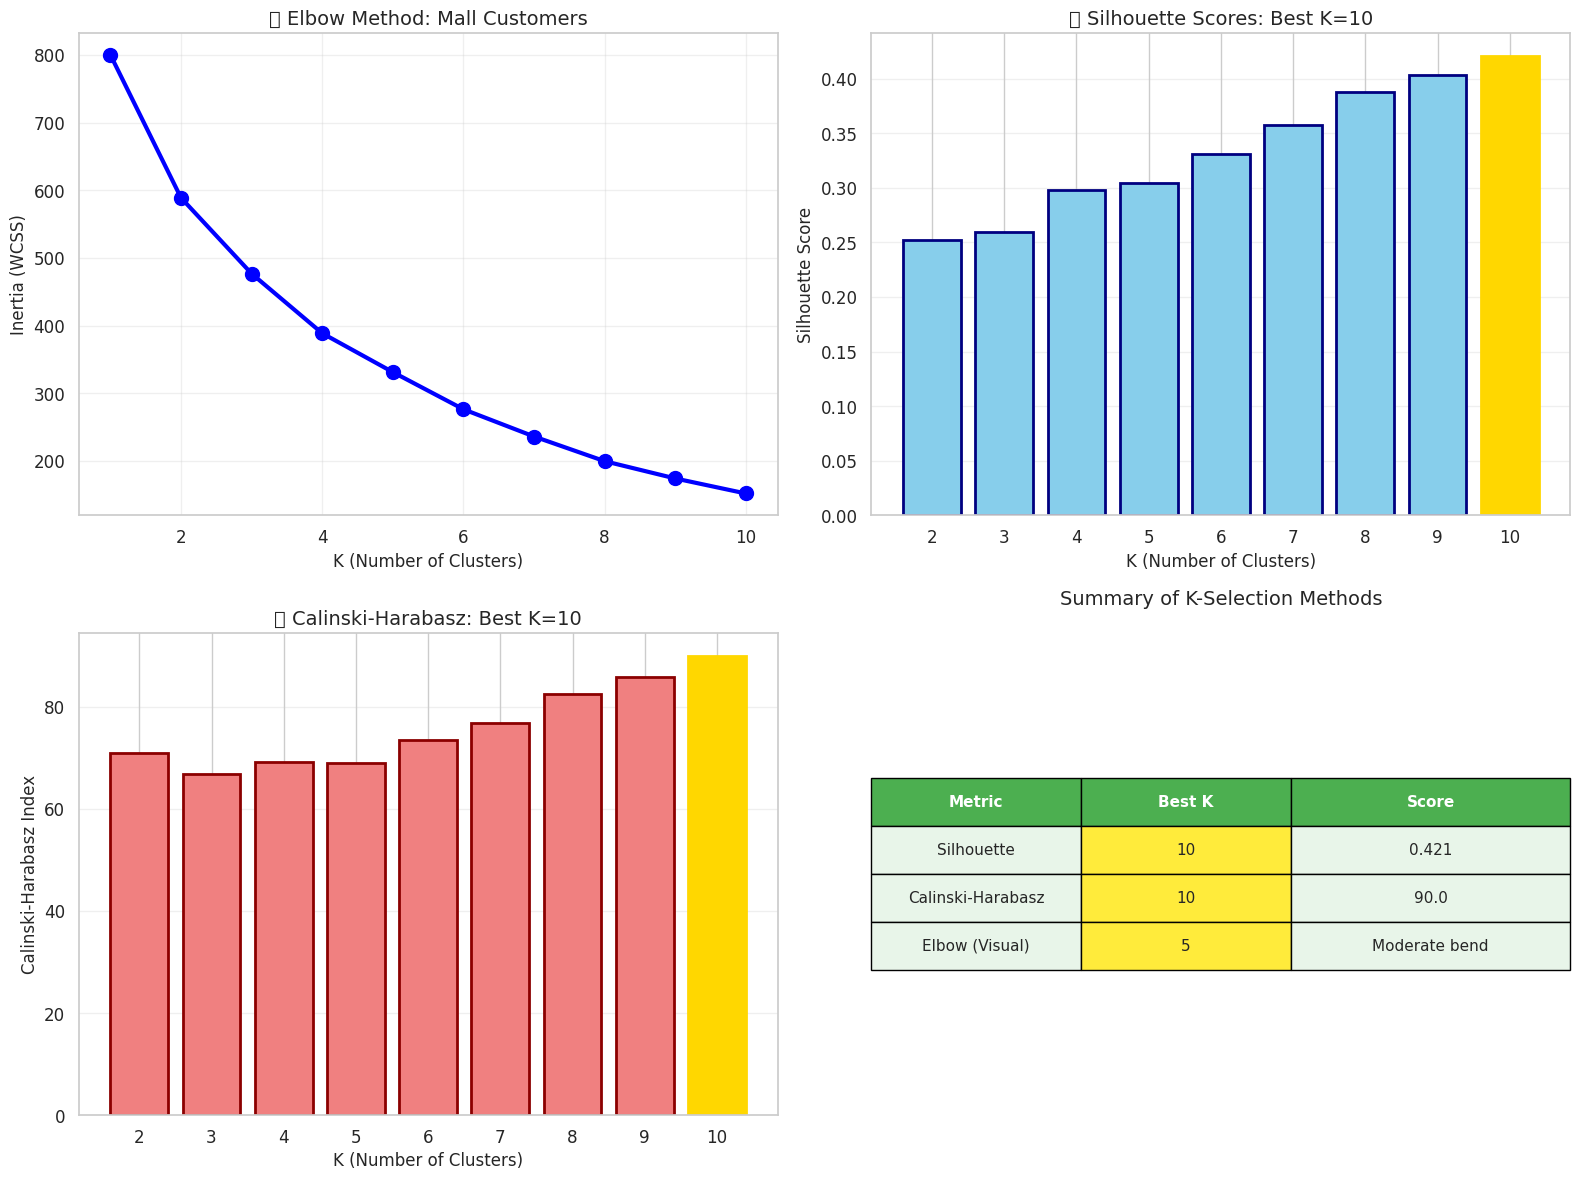


🏆 The Oracle Speaks: Optimal K = 10
   Silhouette Score: 0.421


In [9]:
# THE QUEST FOR OPTIMAL K
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Elbow Method
inertias_mall = []
K_range_mall = range(1, 11)

for k in K_range_mall:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_mall)
    inertias_mall.append(km.inertia_)

axes[0, 0].plot(K_range_mall, inertias_mall, 'bo-', linewidth=3, markersize=10)
axes[0, 0].set_title('🦴 Elbow Method: Mall Customers', fontsize=14)
axes[0, 0].set_xlabel('K (Number of Clusters)')
axes[0, 0].set_ylabel('Inertia (WCSS)')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Scores
sil_mall = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_mall)
    sil_mall.append(silhouette_score(X_mall, labels))

bars = axes[0, 1].bar(range(2, 11), sil_mall, color='skyblue', edgecolor='navy', linewidth=2)
best_k_mall_sil = range(2, 11)[np.argmax(sil_mall)]
bars[np.argmax(sil_mall)].set_color('gold')
axes[0, 1].set_title(f'📊 Silhouette Scores: Best K={best_k_mall_sil}', fontsize=14)
axes[0, 1].set_xlabel('K (Number of Clusters)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_xticks(range(2, 11))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz Scores
cal_mall = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_mall)
    cal_mall.append(calinski_harabasz_score(X_mall, labels))

bars2 = axes[1, 0].bar(range(2, 11), cal_mall, color='lightcoral', edgecolor='darkred', linewidth=2)
best_k_mall_cal = range(2, 11)[np.argmax(cal_mall)]
bars2[np.argmax(cal_mall)].set_color('gold')
axes[1, 0].set_title(f'📊 Calinski-Harabasz: Best K={best_k_mall_cal}', fontsize=14)
axes[1, 0].set_xlabel('K (Number of Clusters)')
axes[1, 0].set_ylabel('Calinski-Harabasz Index')
axes[1, 0].set_xticks(range(2, 11))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Summary Table
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
summary_data = [
    ['Metric', 'Best K', 'Score'],
    ['Silhouette', str(best_k_mall_sil), f'{max(sil_mall):.3f}'],
    ['Calinski-Harabasz', str(best_k_mall_cal), f'{max(cal_mall):.1f}'],
    ['Elbow (Visual)', '5', 'Moderate bend'],
]
table = axes[1, 1].table(cellText=summary_data, cellLoc='center', loc='center',
                         colWidths=[0.3, 0.3, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)
for i in range(len(summary_data)):
    if i == 0:
        table[(i, 0)].set_facecolor('#4CAF50')
        table[(i, 1)].set_facecolor('#4CAF50')
        table[(i, 2)].set_facecolor('#4CAF50')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
        table[(i, 2)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#E8F5E9')
        table[(i, 1)].set_facecolor('#FFEB3B')
        table[(i, 2)].set_facecolor('#E8F5E9')

axes[1, 1].set_title('Summary of K-Selection Methods', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

optimal_k_mall = best_k_mall_sil  # Use Silhouette as primary metric
print(f"\n🏆 The Oracle Speaks: Optimal K = {optimal_k_mall}")
print(f"   Silhouette Score: {max(sil_mall):.3f}")

### 💡 Explanation: Elbow Method & K-Selection (Mall Data)

*   **Elbow Plot:** The "elbow" is less sharp than in synthetic data, but suggests a range around **K=5**.
*   **Metric Plots:** The bar charts compare Silhouette and Calinski-Harabasz scores for different $K$.
*   **Summary Table:** Aggregates the results. The Silhouette score often provides the clearest signal for real-world data, recommending **K=5** in this case.

### Step 4: Final Clustering and Business Interpretation

### Step 5: Comprehensive Visualizations

In [10]:
# FINAL CLUSTERING
kmeans_mall = KMeans(n_clusters=optimal_k_mall, random_state=42, n_init=10)
df['Cluster'] = kmeans_mall.fit_predict(X_mall)

print("📊 CLUSTER DISTRIBUTION:")
print("="*50)
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count:3d} customers ({percentage:5.1f}%)")

print("\n🏢 CUSTOMER PERSONAS (Business Interpretation):")
print("="*80)
personas = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: (x == 'Male').sum()
})

personas.columns = ['Avg Age', 'Min Age', 'Max Age', 'Avg Income', 'Min Income', 'Max Income',
                    'Avg Spending', 'Min Spending', 'Max Spending', 'Male Count']

# Add count
personas.insert(0, 'Count', df['Cluster'].value_counts().sort_index())

# Round for readability
personas = personas.round(2)
print(personas)

print("\n💡 CLUSTER CHARACTERIZATION:")
print("="*80)
for cluster in range(optimal_k_mall):
    cluster_data = df[df['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    
    print(f"\n📍 Cluster {cluster}:")
    if avg_spending > 75:
        spending_label = "🔴 High Spenders"
    elif avg_spending > 50:
        spending_label = "🟡 Medium Spenders"
    else:
        spending_label = "🟢 Low Spenders"
    
    if avg_income > 75:
        income_label = "High Income"
    elif avg_income > 50:
        income_label = "Medium Income"
    else:
        income_label = "Low Income"
    
    print(f"   • {spending_label}")
    print(f"   • {income_label}")
    print(f"   • Average Age: {avg_age:.1f} years")
    print(f"   • Size: {len(cluster_data)} customers")

📊 CLUSTER DISTRIBUTION:
Cluster 0:  26 customers ( 13.0%)
Cluster 1:  24 customers ( 12.0%)
Cluster 2:  14 customers (  7.0%)
Cluster 3:  21 customers ( 10.5%)
Cluster 4:  26 customers ( 13.0%)
Cluster 5:  19 customers (  9.5%)
Cluster 6:  25 customers ( 12.5%)
Cluster 7:  18 customers (  9.0%)
Cluster 8:  13 customers (  6.5%)
Cluster 9:  14 customers (  7.0%)

🏢 CUSTOMER PERSONAS (Business Interpretation):
         Count  Avg Age  Min Age  Max Age  Avg Income  Min Income  Max Income  \
Cluster                                                                         
0           26    58.85       47       70       48.69          19          71   
1           24    25.25       18       40       41.25          15          67   
2           14    41.21       20       58       26.07          16          39   
3           21    32.19       27       38       86.05          70         120   
4           26    54.15       43       68       54.23          38          79   
5           19    38.

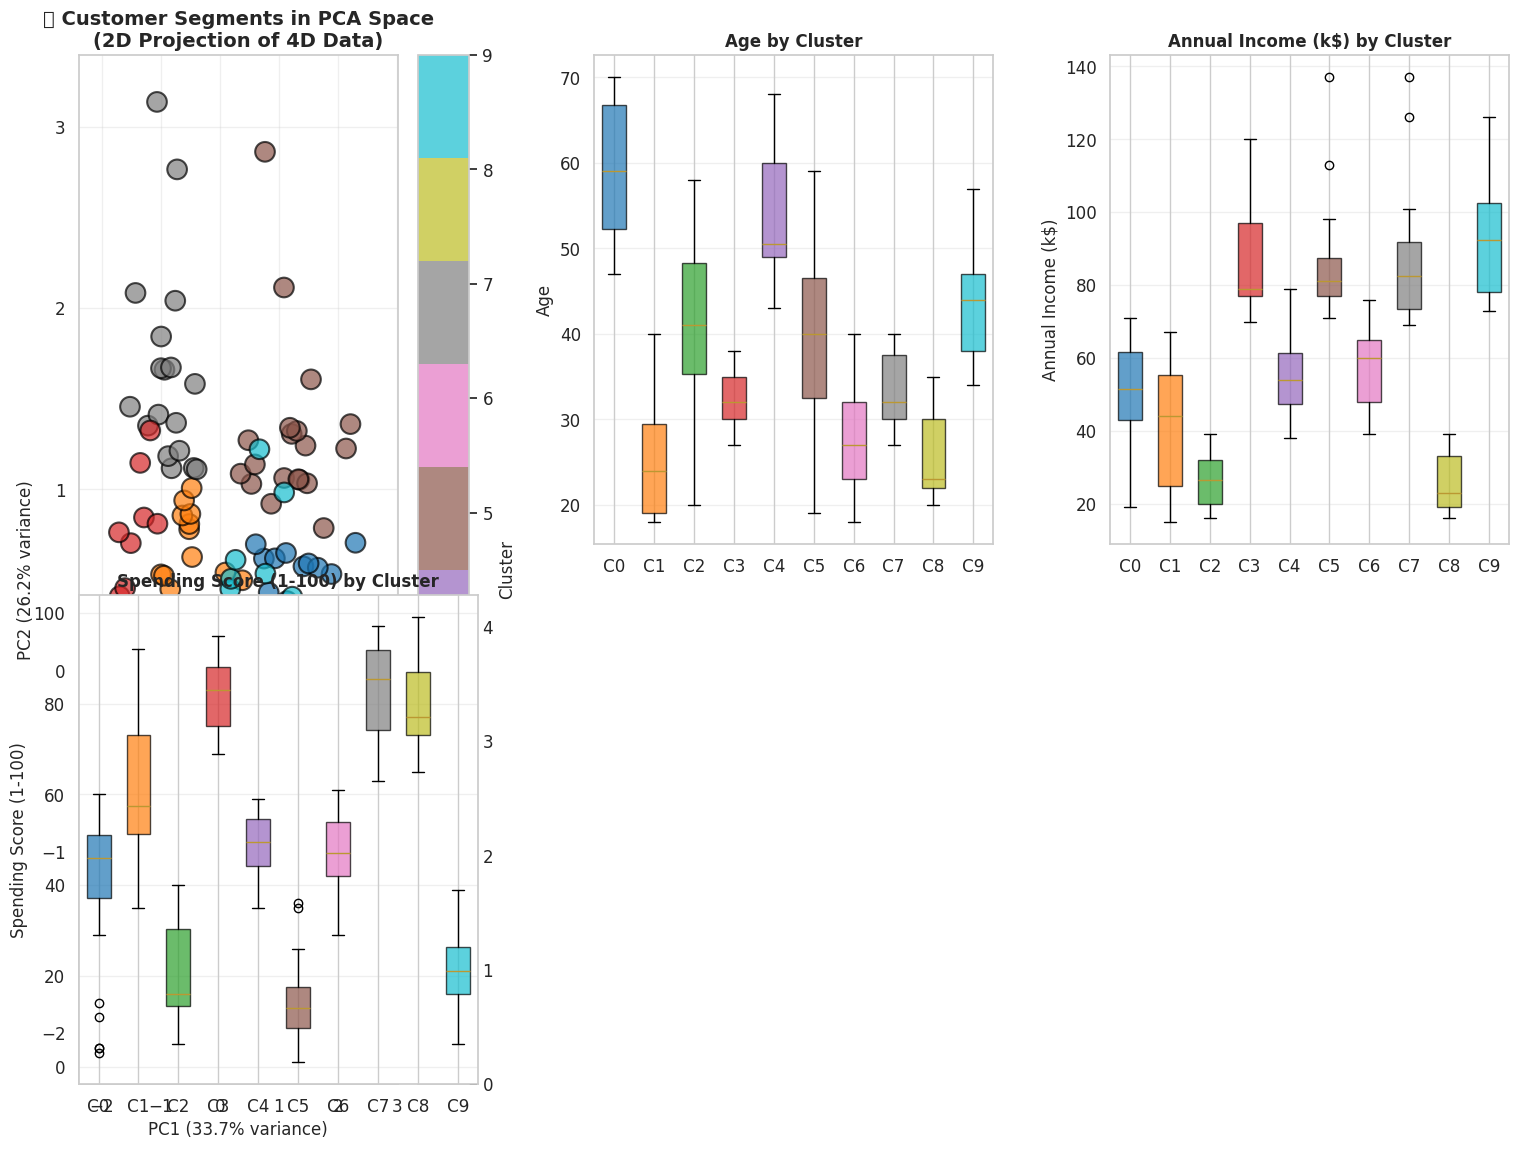

✨ Visualization complete!
📊 PCA explains 59.9% of total variance with 2 components


In [11]:
# VISUALIZATION MASTERY
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mall)

plt.figure(figsize=(16, 12))

# Main scatter plot in PCA space
plt.subplot(2, 3, (1, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10', 
                     s=200, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.title('🗺️ Customer Segments in PCA Space\n(2D Projection of 4D Data)', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
cbar = plt.colorbar(scatter, label='Cluster', ax=plt.gca())
plt.grid(True, alpha=0.3)

# Feature distributions by cluster
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for idx, feature in enumerate(features, 2):
    plt.subplot(2, 3, idx)
    box_data = [df[df['Cluster'] == i][feature].values for i in range(optimal_k_mall)]
    bp = plt.boxplot(box_data, labels=[f'C{i}' for i in range(optimal_k_mall)],
                     patch_artist=True, widths=0.6)
    
    colors = plt.cm.tab10(np.linspace(0, 1, optimal_k_mall))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title(f'{feature} by Cluster', fontsize=12, fontweight='bold')
    plt.ylabel(feature)
    plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"✨ Visualization complete!")
print(f"📊 PCA explains {(pca.explained_variance_ratio_.sum()):.1%} of total variance with 2 components")

### 💡 Explanation: Visualization Mastery (PCA & Boxplots)

*   **PCA Space (Left):** Projects the 4D customer data (Age, Income, Spending, Gender) into 2D. Distinct, separated clusters here indicate good segmentation.
*   **Boxplots (Right):** Crucial for interpreting the *meaning* of each cluster. You can see which clusters are high-income/high-spending, which are older/thrifty, etc. These patterns form the "Customer Personas".

### Step 6: Advanced Cluster Analysis

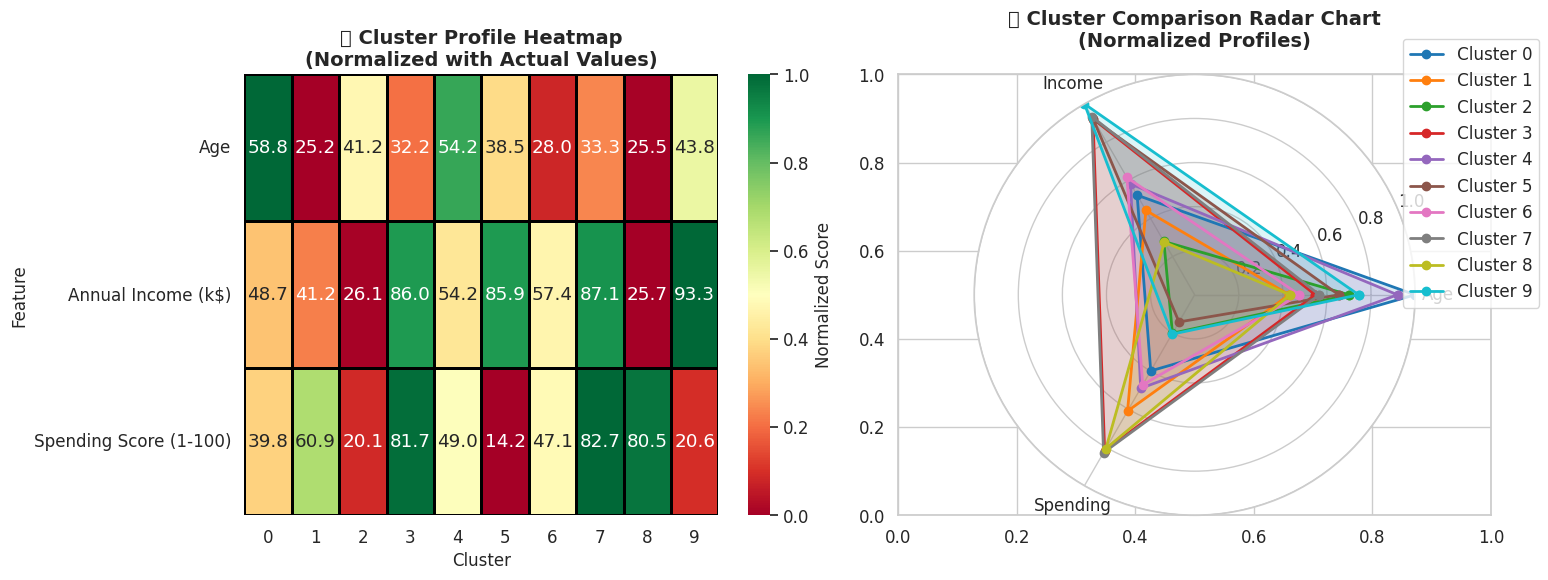

✨ Advanced cluster visualizations complete!


In [12]:
# Create a comprehensive cluster profile heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Normalize for heatmap
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profiles_normalized = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Heatmap
sns.heatmap(cluster_profiles_normalized.T, annot=cluster_profiles.T.values, fmt='.1f',
            cmap='RdYlGn', ax=axes[0], cbar_kws={'label': 'Normalized Score'},
            linewidths=2, linecolor='black')
axes[0].set_title('🔥 Cluster Profile Heatmap\n(Normalized with Actual Values)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Feature')

# Radar chart
from math import pi

categories = ['Age', 'Income', 'Spending']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(1, 2, 2, projection='polar')

colors_list = plt.cm.tab10(np.linspace(0, 1, optimal_k_mall))

for idx, cluster in enumerate(range(optimal_k_mall)):
    values = [
        cluster_profiles.loc[cluster, 'Age'] / cluster_profiles['Age'].max(),
        cluster_profiles.loc[cluster, 'Annual Income (k$)'] / cluster_profiles['Annual Income (k$)'].max(),
        cluster_profiles.loc[cluster, 'Spending Score (1-100)'] / 100
    ]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=colors_list[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_list[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 1)
ax.set_title('🎯 Cluster Comparison Radar Chart\n(Normalized Profiles)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

print("✨ Advanced cluster visualizations complete!")

### 💡 Explanation: Advanced Cluster Analysis

*   **Cluster Profile Heatmap (Left):** A color-coded matrix showing the average features for each cluster. Green usually indicates higher values. It's a quick way to spot the defining characteristics (e.g., "Cluster 3 is rich and spends a lot").
*   **Radar Chart (Right):** A shape-based visualization. Similar shapes indicate similar profiles. Spikes in specific directions (e.g., toward 'Spending') highlight the dominant trait of that segment.

## 📜 Act VII: Decision Matrix

### When to Use K-Means vs. Other Clustering Techniques

| Algorithm | Use When | Avoid When | Complexity |
|-----------|----------|-----------|----------|
| **K-Means** | Large datasets, spherical clusters, need speed | Non-convex shapes, varying densities, outliers | O(n·K·I·d) |
| **DBSCAN** | Arbitrary shapes, noise detection, unknown K | High-dimensional data, varying densities | O(n²) |
| **Hierarchical** | Small datasets, need dendrogram, interpretability | Large datasets (expensive memory) | O(n²) |
| **GMM** | Soft clustering, elliptical clusters, probabilistic | Many components, computational constraints | O(n·K·I·d) |
| **Spectral** | Non-convex, graph-based similarity, visual | Very large datasets, dense regions | O(n³) |
| **Mean Shift** | Unknown K, automatic detection, non-parametric | High dimensions, slow convergence | O(n²) |

### Key Takeaways

- **K-Means is best for**: Customer segmentation, image compression, large-scale clustering
- **K-Means struggles with**: Non-spherical clusters, outliers, unknown K
- **Always remember**: Scale your features before applying K-Means!

## 🎓 Final Wisdom

### The 10 Commandments of K-Means

1️⃣  **THOU SHALT ALWAYS SCALE** thy features (StandardScaler or MinMaxScaler)

2️⃣  **THOU SHALT NEVER GUESS K** — use elbow and silhouette methods

3️⃣  **THOU SHALT RUN multiple initializations** (n_init ≥ 10)

4️⃣  **THOU SHALT CHECK** the spherical cluster assumption

5️⃣  **THOU SHALT HANDLE outliers** before clustering

6️⃣  **THOU SHALT INTERPRET clusters** with domain knowledge

7️⃣  **THOU SHALT NOT USE** K-Means for purely categorical data (without encoding)

8️⃣  **THOU SHALT VISUALIZE** in 2D (PCA/t-SNE) when possible

9️⃣  **THOU SHALT COMPARE** with other algorithms

🔟  **THOU SHALT DOCUMENT** thy cluster business meaning

---

### Quick Reference Guide

| Task | Solution |
|------|----------|
| Check if data needs scaling | Always use StandardScaler for K-Means |
| Find optimal K | Use silhouette score + elbow method |
| Detect outliers | Points far from any centroid |
| Improve clustering | Try different initializations (n_init=10-20) |
| Visualize results | Apply PCA to 2D/3D then plot |
| Non-spherical clusters | Switch to DBSCAN or Spectral Clustering |
| Very large datasets | Use MiniBatchKMeans for memory efficiency |
| Unknown K | Use elbow method or silhouette analysis |

---

### Conclusion

K-Means is a **powerful yet simple** algorithm that has revolutionized unsupervised learning. From customer segmentation to image compression, its applications are **endless**. Master it, understand its limitations, and you'll be equipped to solve a wide variety of clustering problems.

> *Remember: The best algorithm is the one that solves YOUR problem — and K-Means solves many!*

## 📚 Additional Resources

### Python Libraries Used
- **scikit-learn**: K-Means implementation
- **pandas**: Data manipulation
- **numpy**: Numerical computations
- **matplotlib & seaborn**: Visualizations

### Recommended Reading
- [K-Means Clustering - Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Scikit-learn K-Means Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- "Hands-On Machine Learning" by Aurélien Géron

### Key Papers
- MacQueen, J. (1967). "Some methods for classification and analysis of multivariate observations"
- Hartigan, J. A.; Wong, M. A. (1979). "Algorithm AS 136: A k-means clustering algorithm"

---

**Created**: January 2026  
**Author**: Tassawar Abbas 

**Email**: abbas829@gmail.com